In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [1]:
train_df = pd.read_csv('../input/predict-demand/train.csv')
test_df = pd.read_csv('../input/predict-demand/test.csv')

train_df.dropna(subset=['quantity'], inplace=True)

train_df['date'] = pd.to_datetime(train_df['date'], format="%d/%m/%y")
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
# train_df['day_of_week_name'] = train_df['date'].dt.day_name()
train_df['day_of_week'] = train_df['date'].dt.dayofweek
# train_df['is_weekend_name'] = train_df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
train_df['is_weekend'] = train_df['day_of_week'].isin([5, 6]).astype(int)

train_df = train_df.astype({'quantity': int, 'pop': int, 'id': int})
train_df.drop('id', axis=1, inplace=True)

train_df['city_num'] = train_df['city'].astype('category').cat.codes
train_df['shop_num'] = train_df['shop'].astype('category').cat.codes
train_df['brand_num'] = train_df['brand'].astype('category').cat.codes
train_df['container_num'] = train_df['container'].astype('category').cat.codes
train_df['capacity_num'] = train_df['capacity'].astype('category').cat.codes

train_df['lag_1'] = train_df['quantity'].shift(1)
train_df['lag_2'] = train_df['quantity'].shift(2)

train_df['rolling_mean_3'] = train_df['quantity'].rolling(window=3).mean()
train_df['rolling_var_3'] = train_df['quantity'].rolling(window=3).var()

train_df['diff_1'] = train_df['quantity'].diff()
train_df['seasonal_diff_12'] = train_df['quantity'].diff(12)
train_df['seasonal_diff_90'] = train_df['quantity'].diff(90)

train_df['rate_of_change'] = train_df['quantity'].diff() / train_df['quantity'].shift()
train_df['cumulative_sum'] = train_df['quantity'].cumsum()

train_df['ewm_mean'] = train_df['quantity'].ewm(span=12).mean()
train_df['ewm_std'] = train_df['quantity'].ewm(span=12).std()



test_df['date'] = pd.to_datetime(test_df['date'], format="%d/%m/%y")
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day_of_week'] = test_df['date'].dt.dayofweek
test_df['is_weekend'] = test_df['day_of_week'].isin([5, 6]).astype(int)

test_df = test_df.astype({'quantity': int, 'pop': int, 'id': int})
test_df.drop('id', axis=1, inplace=True)

test_df['city_num'] = test_df['city'].astype('category').cat.codes
test_df['shop_num'] = test_df['shop'].astype('category').cat.codes
test_df['brand_num'] = test_df['brand'].astype('category').cat.codes
test_df['container_num'] = test_df['container'].astype('category').cat.codes
test_df['capacity_num'] = test_df['capacity'].astype('category').cat.codes

test_df['lag_1'] = test_df['quantity'].shift(1)
test_df['lag_2'] = test_df['quantity'].shift(2)

test_df['rolling_mean_3'] = test_df['quantity'].rolling(window=3).mean()
test_df['rolling_var_3'] = test_df['quantity'].rolling(window=3).var()

test_df['diff_1'] = test_df['quantity'].diff()
test_df['seasonal_diff_12'] = test_df['quantity'].diff(12)
test_df['seasonal_diff_90'] = test_df['quantity'].diff(90)

test_df['rate_of_change'] = test_df['quantity'].diff() / test_df['quantity'].shift()
test_df['cumulative_sum'] = test_df['quantity'].cumsum()

test_df['ewm_mean'] = test_df['quantity'].ewm(span=12).mean()
test_df['ewm_std'] = test_df['quantity'].ewm(span=12).std()

train_df.head(20)

,date,city,lat,long,pop,shop,brand,container,capacity,price,...,lag_2,rolling_mean_3,rolling_var_3,diff_1,seasonal_diff_12,seasonal_diff_90,rate_of_change,cumulative_sum,ewm_mean,ewm_std
0,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,glass,500ml,0.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13280,13280.000000,NaN
1,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,plastic,1.5lt,2.86,...,NaN,NaN,NaN,-6553.0,NaN,NaN,-0.493449,20007,9730.458333,4633.670737
2,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,can,330ml,0.87,...,13280.0,9951.666667,1.074351e+07,3121.0,NaN,NaN,0.463951,29855,9776.334873,3137.803186
3,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,adult-cola,glass,500ml,1.00,...,6727.0,12208.333333,4.855396e+07,10202.0,NaN,NaN,1.035946,49905,13019.329454,6062.800317
4,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,adult-cola,can,330ml,0.39,...,9848.0,18531.333333,6.451954e+07,5646.0,NaN,NaN,0.281596,75601,16463.535535,8090.559229
5,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,orange-power,glass,500ml,1.00,...,20050.0,20262.333333,2.841607e+07,-10655.0,NaN,NaN,-0.414656,90642,16117.784561,6937.339855
6,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,orange-power,can,330ml,0.43,...,25696.0,25105.000000,9.568555e+07,19537.0,NaN,NaN,1.298916,125220,20237.117049,10325.871045
7,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,gazoza,glass,500ml,0.49,...,15041.0,31451.000000,2.277522e+08,10156.0,NaN,NaN,0.293713,169954,25349.238948,14086.476516
8,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,lemon-boost,glass,500ml,0.70,...,34578.0,32645.000000,1.732484e+08,-26111.0,NaN,NaN,-0.583695,188577,24018.549477,12856.197603
9,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,lemon-boost,plastic,1.5lt,2.21,...,44734.0,24334.000000,3.322711e+08,-8978.0,NaN,NaN,-0.482092,198222,21294.767437,12989.304678


In [2]:
X_train_simple = train_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month']]
X_train = train_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month', 'day_of_week', 'is_weekend', 
                    'lag_1', 'lag_2', 'rolling_mean_3', 'rolling_var_3', 'diff_1', 'seasonal_diff_12', 'seasonal_diff_90', 'rate_of_change', 'cumulative_sum', 'ewm_mean', 'ewm_std']]
y_train = train_df['quantity']

X_test_simple = test_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month']]
X_test = test_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month', 'day_of_week', 'is_weekend',
                  'lag_1', 'lag_2', 'rolling_mean_3', 'rolling_var_3', 'diff_1', 'seasonal_diff_12', 'seasonal_diff_90', 'rate_of_change', 'cumulative_sum', 'ewm_mean', 'ewm_std']]
y_test = test_df['quantity']

In [3]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error, mean_poisson_deviance, mean_gamma_deviance
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

In [4]:
models=[("Linear Regression", LinearRegression()),
        ("Ridge Regression", Ridge()),
        ("Lasso Regression", Lasso()),
        ("Elastic-Net Regression", ElasticNet()),
        ("Decision Tree", DecisionTreeRegressor()),
        ("Random Forest", RandomForestRegressor()),
        ("Extra Trees", ExtraTreesRegressor()),
        ("Gradient Boosting", GradientBoostingRegressor()),
        ("Ada Boost", AdaBoostRegressor()),
        ("XGBRegressor", XGBRegressor()),
        ("LGBMRegressor", LGBMRegressor(verbose=-1)),
        ("CatBoostRegressor", CatBoostRegressor(silent=True)),
        ("KNeighbors", KNeighborsRegressor())]

for name, model in models:
    results = cross_val_score(model, X_train_simple, y_train, cv=10, scoring='r2')
    print(f"\x1b[96m{name}\x1b[0m: \x1b[93m{results.mean():.4f}\x1b[0m ± {results.std():.4f}")

Linear Regression: 0.3398 ± 0.0284
Ridge Regression: 0.3399 ± 0.0283
Lasso Regression: 0.3399 ± 0.0283
Elastic-Net Regression: 0.2612 ± 0.0184
Decision Tree: 0.8399 ± 0.0268
Random Forest: 0.9243 ± 0.0119
Extra Trees: 0.9407 ± 0.0084
Gradient Boosting: 0.8997 ± 0.0134
Ada Boost: 0.5581 ± 0.1580
XGBRegressor: 0.9549 ± 0.0084
LGBMRegressor: 0.9530 ± 0.0060
CatBoostRegressor: 0.9660 ± 0.0042
KNeighbors: 0.0846 ± 0.1710


In [5]:
# model = CatBoostRegressor(silent=True)

# grid = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.3],
#     'depth': [4, 6, 10],
#     'l2_leaf_reg': [1, 3, 5, 7, 9]
# }

# grid_search_result = model.grid_search(grid, X=X_train, y=y_train, plot=True)
# print(grid_search_result['params'])

In [6]:
cb_model = CatBoostRegressor(depth=6, l2_leaf_reg=5, learning_rate=0.05, silent=True).fit(X_train, y_train)
cb_predict = cb_model.predict(X_test)
# cb_model.get_all_params()

print(f"""Тrain: {cb_model.score(X_train, y_train)}\nТest: {cb_model.score(X_test, y_test)}""")
print("")
print("r2_score: ", r2_score(y_test, cb_predict))
print("mean_absolute_error: ", mean_absolute_error(y_test, cb_predict))
print("mean_squared_error: ", mean_squared_error(y_test, cb_predict))
print("root_mean_squared_error: ", mean_squared_error(y_test, cb_predict, squared=False))
print("max_error: ", max_error(y_test, cb_predict))
print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_test, cb_predict))

Тrain: 0.9994850006948054
Тest: 0.9982155965419699

r2_score:  0.9982155965419699
mean_absolute_error:  445.54027047716704
mean_squared_error:  466857.1959951634
root_mean_squared_error:  683.2694900221752
max_error:  6465.198679368463
mean_absolute_percentage_error:  0.018501086347396466


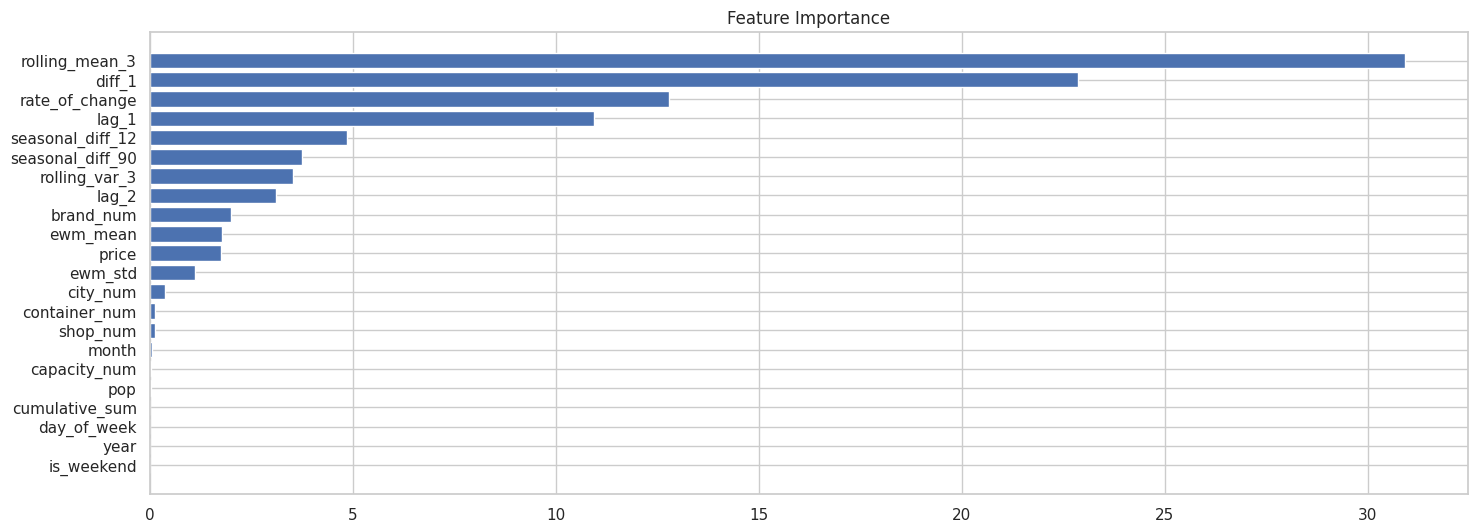

In [7]:
feature_importance = cb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(17, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance');

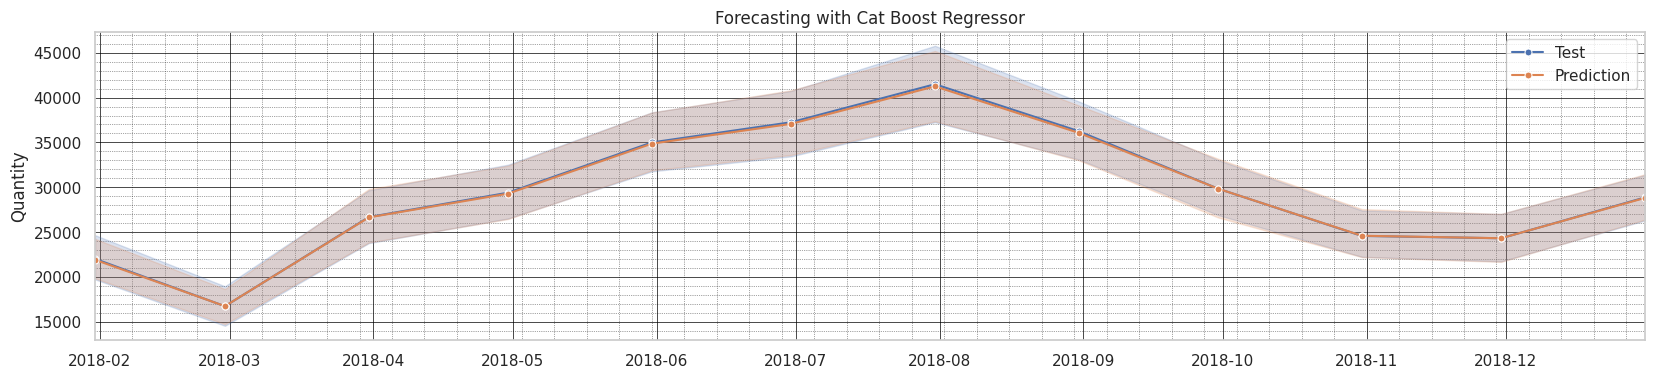

In [8]:
start_date_test = test_df['date'].min()
end_date_test = test_df['date'].max()

f, ax = plt.subplots(figsize=(20, 4))

sns.lineplot(x=test_df['date'], y=test_df['quantity'], marker='o', markersize=5, label="Test")
sns.lineplot(x=test_df['date'], y=cb_predict, marker='o', markersize=5, label="Prediction")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([start_date_test, end_date_test]);

ax.set(xlabel=None)
ax.set_ylabel("Quantity")
ax.set_title(f"Forecasting with Cat Boost Regressor")
ax.legend();

In [9]:
city_to_plot = 'Athens'
shop_1_to_plot = 'shop_1'
shop_2_to_plot = 'shop_3'
brand_to_plot = 'gazoza'
container_to_plot = 'can'

filtered_df_shop_1_test = test_df[(test_df['city'] == city_to_plot) & (test_df['shop'] == shop_1_to_plot) & (test_df['brand'] == brand_to_plot) & (test_df['container'] == container_to_plot)]

X_test_shop_1 = filtered_df_shop_1_test[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month', 'day_of_week', 'is_weekend',
                                         'lag_1', 'lag_2', 'rolling_mean_3', 'rolling_var_3', 'diff_1', 'seasonal_diff_12', 'seasonal_diff_90', 'rate_of_change', 'cumulative_sum', 'ewm_mean', 'ewm_std']]
y_test_shop_1 = filtered_df_shop_1_test['quantity']

cb_predict_shop_1 = cb_model.predict(X_test_shop_1)
print("r2_score: ", r2_score(y_test_shop_1, cb_predict_shop_1))
print("mean_absolute_error: ", mean_absolute_error(y_test_shop_1, cb_predict_shop_1))
print("mean_squared_error: ", mean_squared_error(y_test_shop_1, cb_predict_shop_1))
print("root_mean_squared_error: ", mean_squared_error(y_test_shop_1, cb_predict_shop_1, squared=False))
print("max_error: ", max_error(y_test_shop_1, cb_predict_shop_1))
print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_test_shop_1, cb_predict_shop_1))

r2_score:  0.9976983670985434
mean_absolute_error:  537.5152243338348
mean_squared_error:  799445.229230849
root_mean_squared_error:  894.1170109280155
max_error:  2193.564248524184
mean_absolute_percentage_error:  0.01209330392160784


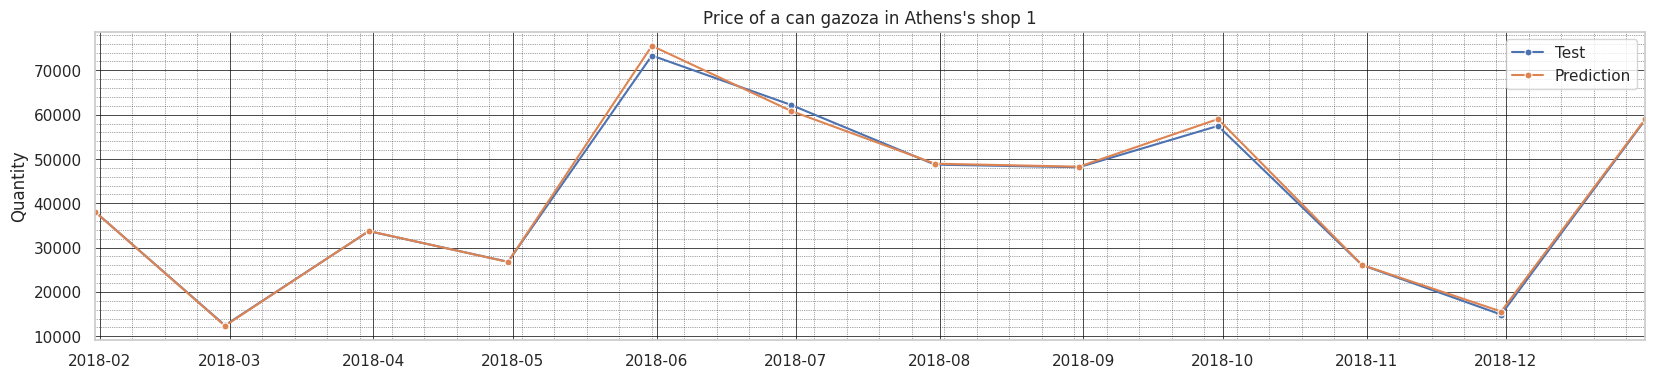

In [10]:
f, ax = plt.subplots(figsize=(20, 4))

sns.lineplot(x=filtered_df_shop_1_test['date'], y=filtered_df_shop_1_test['quantity'], marker='o', markersize=5, label="Test")
sns.lineplot(x=filtered_df_shop_1_test['date'], y=cb_predict_shop_1, marker='o', markersize=5, label="Prediction")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([start_date_test, end_date_test]);

ax.set(xlabel=None)
ax.set_ylabel("Quantity")
ax.set_title(f"Price of a {container_to_plot} {brand_to_plot} in {city_to_plot}'s shop 1")
ax.legend();

In [11]:
filtered_df_shop_2_test = test_df[(test_df['city'] == city_to_plot) & (test_df['shop'] == shop_2_to_plot) & (test_df['brand'] == brand_to_plot) & (test_df['container'] == container_to_plot)]

X_test_shop_2 = filtered_df_shop_2_test[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month', 'day_of_week', 'is_weekend',
                                         'lag_1', 'lag_2', 'rolling_mean_3', 'rolling_var_3', 'diff_1', 'seasonal_diff_12', 'seasonal_diff_90', 'rate_of_change', 'cumulative_sum', 'ewm_mean', 'ewm_std']]
y_test_shop_2 = filtered_df_shop_2_test['quantity']

cb_predict_shop_2 = cb_model.predict(X_test_shop_2)
print("r2_score: ", r2_score(y_test_shop_2, cb_predict_shop_2))
print("mean_absolute_error: ", mean_absolute_error(y_test_shop_2, cb_predict_shop_2))
print("mean_squared_error: ", mean_squared_error(y_test_shop_2, cb_predict_shop_2))
print("root_mean_squared_error: ", mean_squared_error(y_test_shop_2, cb_predict_shop_2, squared=False))
print("max_error: ", max_error(y_test_shop_2, cb_predict_shop_2))
print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_test_shop_2, cb_predict_shop_2))

r2_score:  0.9967806392707856
mean_absolute_error:  572.6346437901202
mean_squared_error:  640990.8640449583
root_mean_squared_error:  800.6190505133876
max_error:  2031.1686210352927
mean_absolute_percentage_error:  0.01471296979179016


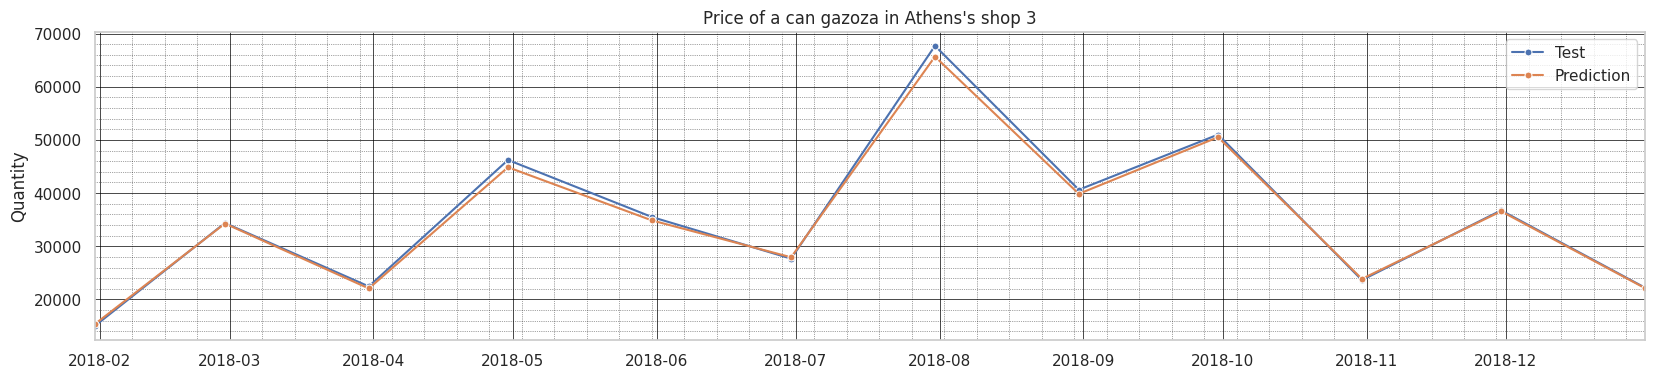

In [12]:
f, ax = plt.subplots(figsize=(20, 4))

sns.lineplot(x=filtered_df_shop_2_test['date'], y=filtered_df_shop_2_test['quantity'], marker='o', markersize=5, label="Test")
sns.lineplot(x=filtered_df_shop_2_test['date'], y=cb_predict_shop_2, marker='o', markersize=5, label="Prediction")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([start_date_test, end_date_test]);

ax.set(xlabel=None)
ax.set_ylabel("Quantity")
ax.set_title(f"Price of a {container_to_plot} {brand_to_plot} in {city_to_plot}'s shop 3")
ax.legend();